# Assignment 2

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. This is the dataset to use for this assignment. Note: The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Ann Arbor, Michigan, United States**, and the stations the data comes from are shown on the map below.

In [523]:
import pandas as pd
pd.set_option('display.max_rows', 500)


In [5]:
import matplotlib.pyplot as plt
import mplleaflet

def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

leaflet_plot_stations(400,'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89')

In [525]:
import pandas as pd
df = pd.read_csv( 'data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')
# station_locations_by_hash = df[df['hash'] == 'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89']

# lons = statio`n_locations_by_hash['LONGITUDE'].tolist()
# lats = station_locations_by_hash['LATITUDE'].tolist()

In [526]:
df.dtypes

ID            object
Date          object
Element       object
Data_Value     int64
dtype: object

In [527]:
df['day']=list(pd.DatetimeIndex(df['Date']).day)
df['month']=list(pd.DatetimeIndex(df['Date']).month)
df['year']=list(pd.DatetimeIndex(df['Date']).year)
df['Date']=pd.to_datetime(df['Date'])
df=df[~((df.month==2) & (df.day==29)) ]
test=df[df.year==2015]
train=df[df.year!=2015]
df=train

In [528]:
test.head()

,ID,Date,Element,Data_Value,day,month,year
19,USC00205563,2015-01-03,TMIN,-39,3,1,2015
30,USC00203712,2015-03-17,TMAX,189,17,3,2015
34,USC00200032,2015-06-06,TMIN,128,6,6,2015
46,USW00014833,2015-08-30,TMIN,178,30,8,2015
50,USC00202308,2015-08-30,TMIN,156,30,8,2015


In [529]:
df.head()

,ID,Date,Element,Data_Value,day,month,year
0,USW00094889,2014-11-12,TMAX,22,12,11,2014
1,USC00208972,2009-04-29,TMIN,56,29,4,2009
2,USC00200032,2008-05-26,TMAX,278,26,5,2008
3,USC00205563,2005-11-11,TMAX,139,11,11,2005
4,USC00200230,2014-02-27,TMAX,-106,27,2,2014


In [530]:
pd.DatetimeIndex(df['Date']).year

array([2014, 2009, 2008, ..., 2014, 2006, 2006], dtype=int32)

In [531]:
max_df=pd.DataFrame(df[df.Element=='TMAX'].groupby(['day','month']).aggregate({'Data_Value':[max]}).reset_index())


In [532]:
max_df.head()

,day,month,Data_Value
,,,max
0,1,1,156
1,1,2,150
2,1,3,117
3,1,4,272
4,1,5,283


In [533]:

max_df.columns = max_df.columns.droplevel(level=1)



In [534]:
min_df=pd.DataFrame(df[df.Element=='TMIN'].groupby(['day','month']).aggregate({'Data_Value':[min]}).reset_index())

min_df.columns = min_df.columns.droplevel(level=1)



In [535]:
min_df.head()

,day,month,Data_Value
0,1,1,-160
1,1,2,-211
2,1,3,-267
3,1,4,-83
4,1,5,-33


In [536]:
max_df.head()

,day,month,Data_Value
0,1,1,156
1,1,2,150
2,1,3,117
3,1,4,272
4,1,5,283


In [537]:
final_data=max_df.merge(min_df,how='left',on=['day','month'])
final_data.columns=['Day','Month','Max','Min']
final_data=final_data.sort_values(['Month','Day']).reset_index(drop=True)

In [538]:
final_data.head()

,Day,Month,Max,Min
0,1,1,156,-160
1,2,1,139,-267
2,3,1,133,-267
3,4,1,106,-261
4,5,1,128,-150


In [539]:
# type(list(final_data['observation'])[0])

In [540]:
def f(x):    
    return str(x['Day']) +'-'+ str(x['Month'] )
                               
# str(final_data['Day'])+str(final_data['Month'])
final_data['observation']=(final_data.apply(f,axis=1))
# final_data['observation']=pd.to_datetime(final_data['observation']).dt.strftime('%d-%m-%Y')


In [541]:
# help(pd.to_datetime)

In [542]:
# final_data['observation']

In [543]:
# final_data['observation']=pd.to_datetime(final_data['observation'],format="%d-%m-%Y",coerce=True,dayfirst=True)

In [544]:
# dates=[str(day)+'-'+str(month) for month in list(final_data['Month'].unique()) for day in final_data['Day'] ]


In [545]:
# list(final_data['observation'])

In [546]:
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
import numpy as np

In [547]:
help(plt.plot)


Help on function plot in module matplotlib.pyplot:

plot(*args, **kwargs)
    Plot lines and/or markers to the
    :class:`~matplotlib.axes.Axes`.  *args* is a variable length
    argument, allowing for multiple *x*, *y* pairs with an
    optional format string.  For example, each of the following is
    legal::
    
        plot(x, y)        # plot x and y using default line style and color
        plot(x, y, 'bo')  # plot x and y using blue circle markers
        plot(y)           # plot y using x as index array 0..N-1
        plot(y, 'r+')     # ditto, but with red plusses
    
    If *x* and/or *y* is 2-dimensional, then the corresponding columns
    will be plotted.
    
    If used with labeled data, make sure that the color spec is not
    included as an element in data, as otherwise the last case
    ``plot("v","r", data={"v":..., "r":...)``
    can be interpreted as the first case which would do ``plot(v, r)``
    using the default line style and color.
    
    If not used wi

In [548]:
# list(final_data['observation`'])
ticks=np.array([idx for idx, element in enumerate(list((final_data['observation']))) if element.split('-')[0]=='1'])

In [592]:
# final_data3.head()
final_data3[final_data3.break_record_min==1]['Min']

4     -155
10    -200
33    -238
44    -239
45    -260
46    -294
47    -272
49    -260
50    -343
51    -322
53    -267
54    -272
55    -217
56    -216
57    -288
58    -272
63    -221
64    -255
65    -222
86    -122
87    -111
88    -122
113    -71
114    -50
139      0
183     72
239     56
289    -55
290    -55
291    -61
292    -39
313    -44
Name: Min, dtype: int64

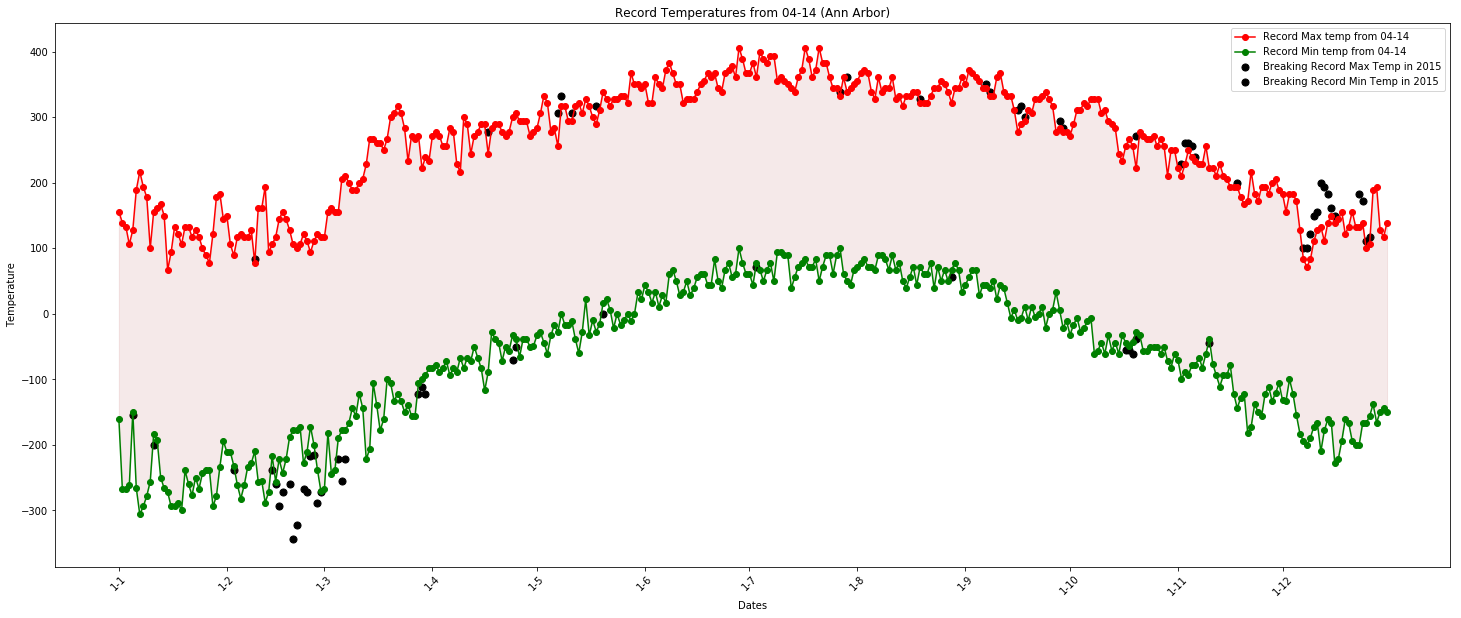

In [616]:
plt.figure(figsize=(25,10))



plt.plot(final_data['Max'],'-o',c='r')
plt.plot(final_data['Min'],'-o',c='g')

plt.scatter(breakthrough_max,list(final_data3[final_data3.break_record_max==1]['Max']),s=50,c='black')

plt.scatter(breakthrough_min,list(final_data3[final_data3.break_record_min==1]['Min']),s=50,c='black')
plt.xticks(ticks, list(np.array(list(final_data['observation']))[ticks]))
ax=plt.gca()
x_axis=plt.gca().xaxis

plt.fill_between(np.arange(0,365,1),final_data['Max'],final_data['Min'],alpha=0.1,color='brown')


for item in x_axis.get_ticklabels():
#     print(item)
    item.set_rotation(45)

plt.title('Record Temperatures from 04-14 (Ann Arbor)')
plt.xlabel('Dates')
plt.ylabel('Temperature')
plt.legend(['Record Max temp from 04-14','Record Min temp from 04-14','Breaking Record Max Temp in 2015','Breaking Record Min Temp in 2015'])
plt.show()

In [550]:
def f(x):    
    return str(x['day']) +'-'+ str(x['month'] )
test['observation']=test.apply(f,axis=1)

In [552]:
# colors_max

In [553]:
min_df=pd.DataFrame(test[test.Element=='TMIN'].groupby(['day','month']).aggregate({'Data_Value':[min]}).reset_index())

min_df.columns = min_df.columns.droplevel(level=1)

max_df=pd.DataFrame(test[test.Element=='TMAX'].groupby(['day','month']).aggregate({'Data_Value':[max]}).reset_index())

max_df.columns = max_df.columns.droplevel(level=1)

final_data2=max_df.merge(min_df,how='left',on=['day','month'])
final_data2.columns=['Day','Month','Max','Min']
final_data2=final_data2.sort_values(['Month','Day']).reset_index(drop=True)

In [554]:
final_data2.head()

,Day,Month,Max,Min
0,1,1,11,-133
1,2,1,39,-122
2,3,1,39,-67
3,4,1,44,-88
4,5,1,28,-155


In [555]:
final_data3=final_data2.merge(final_data,on=['Day','Month'],suffixes=('','_rec'))

def bool_provider(Max_rec,max_temp):
    if Max_rec<max_temp:
        return 1
    else :
        return 0

final_data3['break_record_max']=final_data3.apply(lambda x: bool_provider(x['Max_rec'],x['Max']),axis=1 )
final_data3['break_record_min']=final_data3.apply(lambda x: bool_provider(-1*x['Min_rec'],-1*x['Min']),axis=1 )

In [575]:
final_data3[final_data3['break_record_max']==1]

,Day,Month,Max,Min,Max_rec,Min_rec,observation,break_record_max,break_record_min
39,9,2,83,-116,78,-210,9-2,1,0
106,17,4,278,44,244,-89,17-4,1,0
126,7,5,306,83,256,-28,7-5,1,0
127,8,5,333,89,317,0,8-5,1,0
130,11,5,306,133,294,-11,11-5,1,0
137,18,5,317,128,289,-27,18-5,1,0
207,27,7,339,128,333,100,27-7,1,0
209,29,7,361,128,339,50,29-7,1,0
230,19,8,328,172,322,72,19-8,1,0
249,7,9,350,156,344,44,7-9,1,0


In [586]:
z=zip(list(final_data3.index),list(final_data3['break_record_min']))
w=zip(list(final_data3.index),list(final_data3['break_record_max']))


In [587]:
breakthrough_min=[]
breakthrough_max=[]

for i,j in z:
    if j==1:
        breakthrough_min.append(i)
for i,j in w:
    if j==1:
        breakthrough_max.append(i)        
        
    

In [589]:
breakthrough_max

[39,
 106,
 126,
 127,
 130,
 137,
 207,
 209,
 230,
 249,
 250,
 258,
 259,
 260,
 270,
 271,
 292,
 305,
 306,
 307,
 308,
 309,
 321,
 340,
 341,
 342,
 343,
 344,
 345,
 346,
 347,
 348,
 349,
 356,
 357,
 358,
 359]

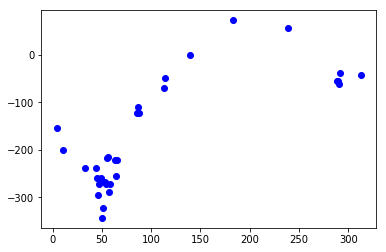

In [602]:
fig=plt.Figure()
plt.scatter(breakthrough_min,list(final_data3[final_data3.break_record_min==1]['Min']),marker='o',c='b')
plt.show()

In [597]:
help(plt.plot)

Help on function plot in module matplotlib.pyplot:

plot(*args, **kwargs)
    Plot lines and/or markers to the
    :class:`~matplotlib.axes.Axes`.  *args* is a variable length
    argument, allowing for multiple *x*, *y* pairs with an
    optional format string.  For example, each of the following is
    legal::
    
        plot(x, y)        # plot x and y using default line style and color
        plot(x, y, 'bo')  # plot x and y using blue circle markers
        plot(y)           # plot y using x as index array 0..N-1
        plot(y, 'r+')     # ditto, but with red plusses
    
    If *x* and/or *y* is 2-dimensional, then the corresponding columns
    will be plotted.
    
    If used with labeled data, make sure that the color spec is not
    included as an element in data, as otherwise the last case
    ``plot("v","r", data={"v":..., "r":...)``
    can be interpreted as the first case which would do ``plot(v, r)``
    using the default line style and color.
    
    If not used wi